In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [20]:
?pd.read_csv

In [95]:
feature_train=pd.read_csv('Molecular_Descriptor.csv',index_col='SMILES')
label_train=pd.read_csv('ERα_activity.csv',index_col='SMILES')


In [96]:
del label_train['IC50_nM']

In [23]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4 to COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@H]3C[C@H]4O[C@@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1
Columns: 729 entries, nAcid to Zagreb
dtypes: float64(359), int64(370)
memory usage: 11.0+ MB


In [25]:
?pd.concat

In [30]:
#data=pd.concat((feature_train,label_train['pIC50']),axis=1)

In [97]:
#data.dtypes.value_counts()

float64    360
int64      145
dtype: int64

In [33]:
for s in data.columns:
    print(s,'的特征分布：')
    print(data[s].value_counts())

nAcid 的特征分布：
0    1780
1     177
2      15
3       1
4       1
Name: nAcid, dtype: int64
ALogP 的特征分布：
1.8579    9
0.7296    8
1.2029    6
1.0069    6
1.8338    6
         ..
1.1968    1
0.9420    1
1.4848    1
0.0239    1
2.8165    1
Name: ALogP, Length: 1605, dtype: int64
ALogp2 的特征分布：
3.451792    9
0.532316    8
3.362822    6
1.013848    6
1.446968    6
           ..
7.570752    1
1.432330    1
0.887364    1
2.204631    1
7.932672    1
Name: ALogp2, Length: 1590, dtype: int64
AMR 的特征分布：
148.8682    9
139.9304    8
141.6032    6
88.3037     6
88.4293     6
           ..
90.5701     1
87.9712     1
91.1016     1
84.8648     1
164.3947    1
Name: AMR, Length: 1631, dtype: int64
apol 的特征分布：
77.158583    21
74.064997    16
40.760723    12
79.112169    12
80.076962    10
             ..
85.985583     1
56.661860     1
64.446239     1
61.242860     1
81.368618     1
Name: apol, Length: 1316, dtype: int64
naAromAtom 的特征分布：
18    554
12    374
15    193
21    187
16    148
6     111
0      53

23.492989    52
14.275656    46
14.982763    42
13.405413    35
22.622745    34
             ..
15.284093     1
19.371668     1
12.292529     1
21.725404     1
26.984552     1
Name: SP-0, Length: 573, dtype: int64
SP-1 的特征分布：
10.079719    23
16.153000    22
16.580520    21
9.558551     19
9.969234     18
             ..
10.809663     1
12.562882     1
10.168234     1
13.903817     1
18.870143     1
Name: SP-1, Length: 991, dtype: int64
SP-2 的特征分布：
9.269671     14
14.473194    11
10.536718    11
8.420275     10
8.761923     10
             ..
12.787228     1
13.409090     1
14.211959     1
14.565513     1
19.486828     1
Name: SP-2, Length: 1347, dtype: int64
SP-3 的特征分布：
9.816081     11
12.214228    11
7.053206     10
7.499941     10
7.956569      9
             ..
6.930694      1
7.428511      1
8.006736      1
6.738286      1
15.310538     1
Name: SP-3, Length: 1418, dtype: int64
SP-4 的特征分布：
8.491143     11
5.966542     10
6.618297     10
10.083315    10
6.277991      9
             .

0.000000    125
0.924225      7
0.997247      6
0.996499      5
0.991074      5
           ... 
0.511617      1
0.512111      1
0.503847      1
0.584148      1
2.118206      1
Name: SHBd, Length: 1677, dtype: int64
SwHBd 的特征分布：
0.000000    1939
1.287119       3
0.638337       2
0.691961       2
0.738836       2
0.257164       2
1.092678       1
0.661825       1
0.667110       1
0.672301       1
2.078840       1
0.670571       1
0.660794       1
0.864382       1
1.239382       1
0.667769       1
1.137867       1
0.717678       1
0.336505       1
0.845921       1
0.707367       1
0.599097       1
1.292900       1
1.253005       1
1.356535       1
1.350019       1
0.554833       1
0.353444       1
0.396008       1
0.667484       1
Name: SwHBd, dtype: int64
SHBa 的特征分布：
35.280436    6
33.189786    3
21.920135    3
28.872735    3
21.064867    3
            ..
37.191778    1
50.903970    1
38.293183    1
38.742589    1
78.139817    1
Name: SHBa, Length: 1869, dtype: int64
SwHBa 的特征分布：
27.1412

 0.194006    6
 0.139596    4
-1.072710    3
 0.023278    3
 0.268495    3
            ..
-0.402729    1
-0.328076    1
-0.509630    1
-0.525833    1
-0.048992    1
Name: minwHBa, Length: 1847, dtype: int64
minHBint2 的特征分布：
0.000000    1545
7.606146       3
7.350681       3
7.473317       3
7.433628       3
            ... 
5.414904       1
7.159422       1
6.455195       1
0.179875       1
1.315401       1
Name: minHBint2, Length: 408, dtype: int64
minHBint3 的特征分布：
0.000000    1567
4.938403       2
1.125620       2
0.603276       2
7.266939       2
            ... 
1.085606       1
8.236160       1
7.659502       1
8.307561       1
2.771831       1
Name: minHBint3, Length: 397, dtype: int64
minHBint4 的特征分布：
 0.000000    1142
 2.928348       4
-0.773156       3
 2.913547       3
-0.771763       3
             ... 
-0.667916       1
-0.733363       1
-0.662692       1
-0.727304       1
 5.256808       1
Name: minHBint4, Length: 778, dtype: int64
minHBint5 的特征分布：
0.000000    1261
3.04867

Name: minaaSe, dtype: int64
mindssSe 的特征分布：
0    1974
Name: mindssSe, dtype: int64
minssssssSe 的特征分布：
0    1974
Name: minssssssSe, dtype: int64
minddssSe 的特征分布：
0    1974
Name: minddssSe, dtype: int64
minsBr 的特征分布：
 0.000000    1859
 0.042634       3
 0.036849       2
-0.034697       1
 0.050627       1
             ... 
-0.036512       1
-0.011187       1
 0.029790       1
-0.083726       1
 0.047215       1
Name: minsBr, Length: 113, dtype: int64
minsSnH3 的特征分布：
0    1974
Name: minsSnH3, dtype: int64
minssSnH2 的特征分布：
0    1974
Name: minssSnH2, dtype: int64
minsssSnH 的特征分布：
0    1974
Name: minsssSnH, dtype: int64
minssssSn 的特征分布：
0    1974
Name: minssssSn, dtype: int64
minsI 的特征分布：
 0.000000    1970
-0.040317       1
-0.038517       1
-0.059350       1
-0.048529       1
Name: minsI, dtype: int64
minsPbH3 的特征分布：
0    1974
Name: minsPbH3, dtype: int64
minssPbH2 的特征分布：
0    1974
Name: minssPbH2, dtype: int64
minsssPbH 的特征分布：
0    1974
Name: minsssPbH, dtype: int64
minssssPb 的特征分布：
0    1

Name: maxaaN, Length: 453, dtype: int64
maxsssN 的特征分布：
0.000000    1093
2.499274       7
2.502967       4
2.471717       4
2.438958       4
            ... 
1.298729       1
1.631909       1
1.655080       1
1.623830       1
2.487796       1
Name: maxsssN, Length: 788, dtype: int64
maxddsN 的特征分布：
0    1974
Name: maxddsN, dtype: int64
maxaasN 的特征分布：
0.000000    1783
2.329332       2
2.283422       2
2.115185       2
2.349908       1
            ... 
1.413583       1
2.199933       1
1.969333       1
1.505470       1
2.017170       1
Name: maxaasN, Length: 189, dtype: int64
maxssssNp 的特征分布：
0.00000    1973
0.86878       1
Name: maxssssNp, dtype: int64
maxsOH 的特征分布：
0.000000     426
10.136089      6
10.016644      3
9.977508       3
9.395845       3
            ... 
10.114390      1
10.110930      1
10.097010      1
10.062797      1
9.815320       1
Name: maxsOH, Length: 1431, dtype: int64
maxdO 的特征分布：
0.000000     924
10.837359      3
12.180667      3
12.845989      3
10.854652      3
  

0.57353    43
0.59091    40
0.60000    34
0.75000    32
0.91667    26
           ..
0.35185     1
0.80882     1
0.74000     1
0.90323     1
0.79605     1
Name: ETA_BetaP_ns, Length: 500, dtype: int64
ETA_dBeta 的特征分布：
-1.75     65
-0.75     61
 2.50     59
 4.75     52
-1.50     51
          ..
-13.75     1
-12.25     1
 9.75      1
-7.25      1
 10.00     1
Name: ETA_dBeta, Length: 105, dtype: int64
ETA_dBetaP 的特征分布：
 0.00000    48
 0.25000    40
-0.05147    28
-0.03788    22
-0.02143    18
            ..
 0.00806     1
 0.38158     1
 0.35000     1
 0.35526     1
-0.20968     1
Name: ETA_dBetaP, Length: 695, dtype: int64
ETA_Beta_ns_d 的特征分布：
1.0    633
1.5    579
0.5    374
0.0    203
2.0    146
2.5     34
3.0      2
3.5      2
4.0      1
Name: ETA_Beta_ns_d, dtype: int64
ETA_BetaP_ns_d 的特征分布：
0.00000    203
0.04545     98
0.05000     76
0.04412     74
0.04286     65
          ... 
0.12500      1
0.08696      1
0.13636      1
0.11364      1
0.05952      1
Name: ETA_BetaP_ns_d, Length:

Name: MW, Length: 1316, dtype: int64
WTPT-1 的特征分布：
47.575753    11
40.836976    10
38.955546    10
42.883311     9
68.748923     8
             ..
44.498710     1
73.148073     1
70.711018     1
66.828986     1
84.660642     1
Name: WTPT-1, Length: 1460, dtype: int64
WTPT-2 的特征分布：
2.068511    11
2.041849    10
2.050292    10
2.042062     9
2.083301     8
            ..
2.022669     1
2.031891     1
2.079736     1
2.088406     1
2.064894     1
Name: WTPT-2, Length: 1460, dtype: int64
WTPT-3 的特征分布：
14.723890    7
18.011114    6
5.096770     6
5.092732     6
7.559880     5
            ..
8.697485     1
8.687114     1
11.278514    1
5.087917     1
24.923083    1
Name: WTPT-3, Length: 1678, dtype: int64
WTPT-4 的特征分布：
0.000000     50
5.096770     11
5.063850      8
5.087105      7
5.054479      6
             ..
13.610350     1
7.592018      1
11.317284     1
8.847292      1
21.400883     1
Name: WTPT-4, Length: 1571, dtype: int64
WTPT-5 的特征分布：
0.000000     492
3.406644       8
3.406716     

d:\download\minconda\envs\d2l-zh\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pIC50', ylabel='Density'>

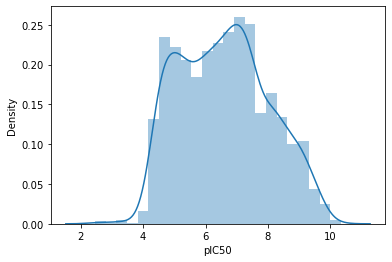

In [88]:
sns.distplot(data['pIC50'])

In [56]:
corrlation['pIC50'].isna().sum()

225

In [81]:
#data['n10Ring'].value_counts()
data['hmin'].nunique()


1653

In [98]:
#删除数据只有一种的特征
for  s in feature_train.columns:
    if feature_train[s].nunique()==1:
        del feature_train[s]    

In [99]:
feature_train.shape

(1974, 504)

In [82]:
corrlation=data.corr()
corrlation['pIC50'].sort_values()

hmin                -0.426366
C1SP2               -0.406928
ATSc3               -0.351857
ETA_Epsilon_4       -0.351555
mindO               -0.335270
                       ...   
maxsOH               0.466625
LipoaffinityIndex    0.491857
MLogP                0.529328
MDEC-23              0.538053
pIC50                1.000000
Name: pIC50, Length: 505, dtype: float64

In [83]:
cor_1=pd.DataFrame(corrlation['pIC50'])


In [86]:
cor_1=abs(cor_1)

pIC50    25
dtype: int64

In [87]:
#应用随机森林来选择特征
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split


In [100]:
forest = RandomForestRegressor(n_estimators=500, random_state=0, max_features=100,  n_jobs=2) 
forest.fit(feature_train,label_train)

C:\Users\Aaron\AppData\Local\Temp/ipykernel_23292/2995366988.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(feature_train,label_train)


RandomForestRegressor(max_features=100, n_estimators=500, n_jobs=2,
                      random_state=0)

In [117]:
#sorted(forest.feature_importances_, reverse=True)
forest.feature_importances_[2]

0.0022934395476585487

In [228]:
feature_impor=pd.DataFrame(forest.feature_importances_)
feature_impor['rank']=range(0,504)
feature_impor.columns=['s','rank']
feature_impor

,s,rank
0,0.000100,0
1,0.003281,1
2,0.002293,2
3,0.008669,3
4,0.002243,4
...,...,...
499,0.004232,499
500,0.001057,500
501,0.000643,501
502,0.003805,502


In [229]:
feature_impor=feature_impor.sort_values(by='s',ascending=False)

In [230]:
choose_feature=[]
for i in range(504):
    if feature_impor.iloc[i,0]>=float(feature_impor['s'].quantile(0.89)):
        choose_feature.append(feature_train.columns[feature_impor.iloc[i,1]])

len(choose_feature)

56

,MDEC-23,LipoaffinityIndex,MLogP,nC,maxHsOH,minsssN,minHsOH,BCUTc-1l,maxssO,SHsOH,...,ATSp1,WTPT-4,CrippenLogP,nsOH,XLogP,VCH-5,ETA_BetaP_s,minHBint6,nHsOH,mindO
MDEC-23,1.000000,0.708134,0.832241,0.775807,0.205894,0.486881,0.169654,-0.276885,0.408743,0.159171,...,0.694143,0.284029,0.626055,0.219097,0.372816,0.106946,0.008916,-0.173059,0.219097,-0.067162
LipoaffinityIndex,0.708134,1.000000,0.891029,0.774522,0.024670,0.574888,0.025091,-0.122688,0.322083,-0.159268,...,0.622074,-0.114875,0.781812,-0.076578,0.719401,0.012981,-0.162217,-0.276929,-0.076578,-0.251658
MLogP,0.832241,0.891029,1.000000,0.909434,0.085157,0.529384,0.061318,-0.255074,0.399374,-0.021842,...,0.774221,0.158376,0.689403,0.090124,0.637601,0.065126,-0.201593,-0.233164,0.090124,-0.137389
nC,0.775807,0.774522,0.909434,1.000000,0.002710,0.533325,-0.024062,-0.177045,0.443980,-0.056746,...,0.931981,0.391300,0.539211,0.035098,0.472318,0.111204,0.000823,-0.221541,0.035098,-0.010533
maxHsOH,0.205894,0.024670,0.085157,0.002710,1.000000,0.052235,0.950769,-0.652815,0.054897,0.836405,...,-0.092485,0.206140,0.135100,0.788405,0.038018,-0.290302,-0.280706,0.239523,0.788405,-0.203484
minsssN,0.486881,0.574888,0.529384,0.533325,0.052235,1.000000,0.088362,-0.153156,0.353748,-0.044227,...,0.493795,0.101451,0.332208,0.000538,0.095217,0.031578,0.262811,-0.166763,0.000538,-0.144182
minHsOH,0.169654,0.025091,0.061318,-0.024062,0.950769,0.088362,1.000000,-0.602109,0.089461,0.749172,...,-0.129834,0.163428,0.122011,0.679194,0.013169,-0.306239,-0.234901,0.226246,0.679194,-0.233683
BCUTc-1l,-0.276885,-0.122688,-0.255074,-0.177045,-0.652815,-0.153156,-0.602109,1.000000,-0.247030,-0.557629,...,-0.097724,-0.322451,-0.121123,-0.631155,-0.110596,0.121110,0.189810,-0.106740,-0.631155,0.193009
maxssO,0.408743,0.322083,0.399374,0.443980,0.054897,0.353748,0.089461,-0.247030,1.000000,0.022689,...,0.362702,0.551342,0.338802,0.051448,0.110652,0.074108,0.181366,0.077643,0.051448,-0.022380
SHsOH,0.159171,-0.159268,-0.021842,-0.056746,0.836405,-0.044227,0.749172,-0.557629,0.022689,1.000000,...,-0.118607,0.337685,0.020024,0.958125,-0.101380,-0.237750,-0.161097,0.224630,0.958125,-0.189570


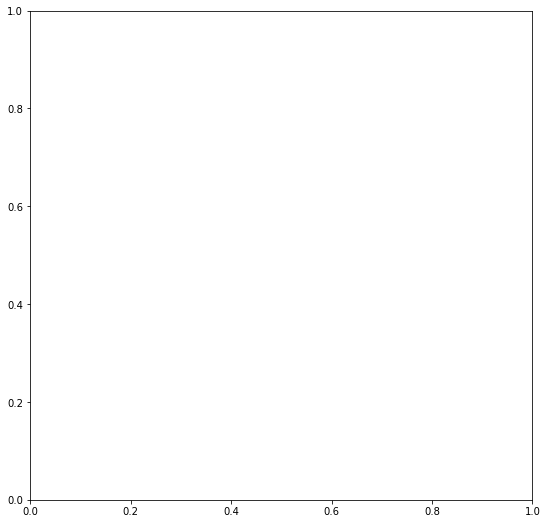

In [231]:
#然后通过相关分析提出自相关的变量
cor=feature_train[choose_feature].corr()
f , ax = plt.subplots(figsize = (9,9))


cor

In [232]:
for i in range(55):
    for  j in range(55):
        if i !=j:
            if cor.iloc[i,j]>0.5 and cor.index[i] in choose_feature and cor.columns[j] in choose_feature:
                if len(choose_feature)==20:
                    break;
                choose_feature.remove(cor.columns[j])
                
                
                
                
choose_feature     
final_feature_train=feature_train[choose_feature]
final_feature_train.shape

(1974, 21)

In [237]:
final_feature_train.to_csv('final.csv') 

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor 
from lightgbm.sklearn import LGBMRegressor

In [234]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
       GradientBoostingRegressor(),
       MLPRegressor(hidden_layer_sizes=(50),solver='lbfgs',max_iter=100),
        XGBRegressor(n_estimator=100,objective='reg:squarederror'),
        LGBMRegressor(n_estimator=100)
       ]

result=dict()
for model in models:
    model_name = str(model).split('(')[0]
    scores = cross_val_score(model, X=final_feature_train, y=label_train, verbose=0, cv = 5,scoring=make_scorer(mean_squared_error))
    result[model_name] = scores
    print(model_name + ' is finished')
#表格表示
result = pd.DataFrame(result)
result.index = ['cv' + str(x) for x in range(1, 6)]
result

LinearRegression is finished
DecisionTreeRegressor is finished


d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConvers

RandomForestRegressor is finished


d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GradientBoostingRegressor is finished


d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\download\minconda\envs\d2l-zh\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
d:\download\minconda\envs\d2l-zh\lib\site-pack

MLPRegressor is finished
[19:30:56] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:30:56] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:30:57] WARNING: ..\src\learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you fi

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,LGBMRegressor
cv1,0.847049,1.917903,0.718402,0.706266,0.670726,0.983154,0.887868
cv2,0.719566,2.064269,0.627625,0.632428,0.837934,0.586317,0.649590
cv3,0.899025,1.292795,0.781737,0.779887,0.874925,0.999408,0.879154
cv4,2.093724,2.352413,1.116827,1.076843,1.366192,1.070108,1.108118
cv5,1.389543,2.381274,1.491859,1.508647,1.533531,1.566166,1.462994


In [235]:
result.mean()

LinearRegression             1.189781
DecisionTreeRegressor        2.001731
RandomForestRegressor        0.947290
GradientBoostingRegressor    0.940814
MLPRegressor                 1.056662
XGBRegressor                 1.041030
LGBMRegressor                0.997545
dtype: float64

In [222]:
feature_test=pd.read_csv('Molecular_Descriptor_test.csv',index_col='SMILES')
label_test=pd.read_csv('ERα_activity_test.csv',index_col='SMILES')